# 011. Pandas 내장 함수를 이용한 시각화

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#한글 폰트 사용
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager

if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = "C:/Windows/Fonts/gulim.TTC"  # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 5)

plt.style.use("seaborn-colorblind")
np.random.seed(123)

## Series / DataFrame 의 plotting

- X 축 : index value   

- Y 축 : 해당 index 의 value

- plot 의 kind

    * `line` (default)
    * `bar` : vertical bar plots
    * `barh` :  horizontal bar plots
    * `hist` : histogram
    * `box` : boxplot
    * `kde` or `density` : density plots
    * `area` : area plots
    * `pie` : pie plots
    * `scatter` : scatter plots
    * `hexbin` : hexbin plot

In [2]:
df = pd.DataFrame({"A": np.random.randn(365).cumsum(),
                    "B": np.random.randn(365).cumsum() + 20,
                    "C": np.random.randn(365).cumsum() - 20},
                    index=pd.date_range('1/1/2021', periods=365))
                  
df.head()

,A,B,C
2021-01-01,-1.085631,20.059291,-20.230904
2021-01-02,-0.088285,21.803332,-16.659325
2021-01-03,0.194693,20.835588,-17.055481
2021-01-04,-1.311601,21.255156,-17.093802
2021-01-05,-1.890202,21.462083,-19.518638


<AxesSubplot:>

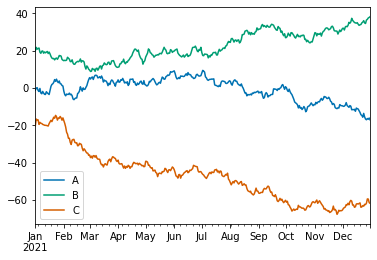

In [3]:
# 모든 column 을 동시에 plot
df.plot()

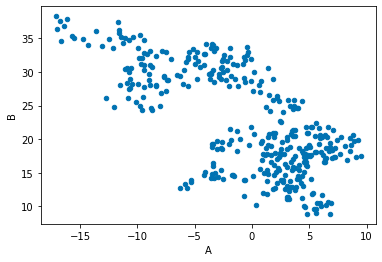

In [4]:
# 특정 column 을 x 축, y 축으로 지정
df.plot('A', 'B', kind='scatter');

- 2 차원 평면상의 3 차원 정보 plot

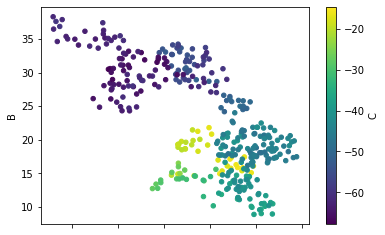

In [5]:
# Pandas 내장 시각화 기능 사용
df.plot.scatter('A', 'B', c='C', colormap='viridis');

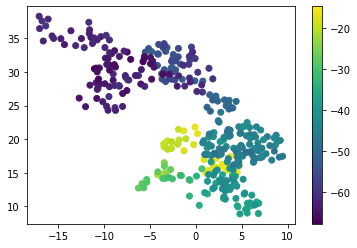

In [6]:
# matplotlib 사용
plt.scatter(df.A, df.B, c=df.C, cmap='viridis')
plt.colorbar()

- box plot

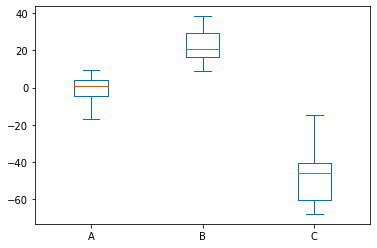

In [7]:
#df.plot.box();
df.plot(kind="box");

- histogram

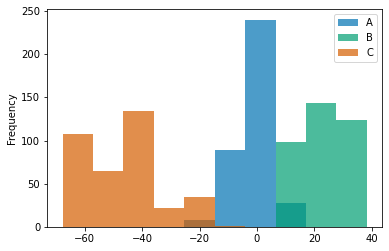

In [8]:
#df.plot(kind="hist", alpha=0.7);
df.plot.hist(alpha=0.7);

가우스 커널을 사용하여 커널 밀도 추정 플롯 생성

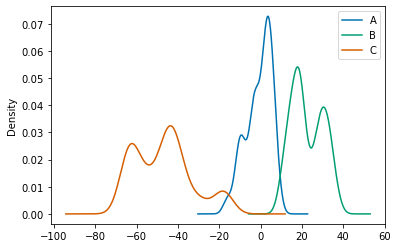

In [9]:
df.plot.kde();
#df.plot(kind="kde")

## 실습 : 1980년부터 2013년까지 캐나다로의 이민 분석

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

이 데이터 세트에는 목적지 국가에서 기록한 국제 이민자의 흐름에 대한 연간 데이터가 포함되어 있습니다. 자료는 출생지, 시민권 또는 외국인과 국민 모두를 위한 이전/다음 거주지에 따라 유입과 유출을 모두 나타냅니다. 현재 버전은 45 개국에 관한 데이터를 제공합니다.

이 실습에서는 캐나다 이민 데이터에 중점을 둘 것입니다.

In [10]:
# !pip install openpyxl

In [11]:
import pandas as pd
import matplotlib.patches as mpatches # needed for waffle Charts

df_can = pd.read_excel('data/Canada.xlsx', engine='openpyxl',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [13]:
# 데이터 세트를 정리하여 불필요한 열(예 : AREA, REG)을 제거
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [14]:
# 이해하기 쉽게 열 이름을 변경
df_can.rename(columns={'OdName': 'Country', 
                                          'AreaName': 'Continent', 
                                         'RegName': 'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [15]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [16]:
# 국가 이름을 색인으로 설정하면 .loc 메소드를 사용하여 국가를 빠르게 찾는 데 유용
df_can.set_index('Country', inplace=True)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [17]:
years = [y for y in range(1980, 2014)]
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [18]:
# total column 추가
df_can['Total'] = df_can.iloc[:, 3:].sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [19]:
df_can.shape

(195, 38)

- Haiti 의 연도별 이민자 수 시각화 - Line Plot

Text(2005, 6000, '2010 지진발생')

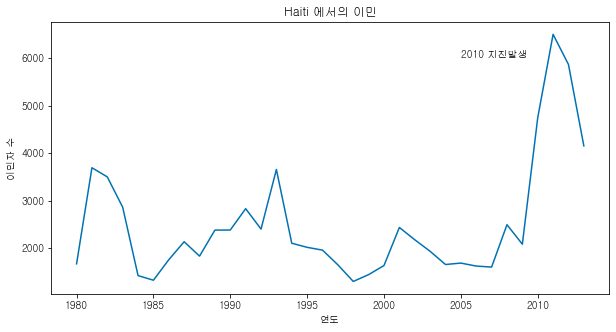

In [25]:
haiti = df_can.loc['Haiti', years]   # 'total' 열을 제외한 1980년 - 2013년의 Haiti data

haiti.plot(kind='line')

ax = plt.gca()
ax.set_xlabel('연도')
ax.set_ylabel('이민자 수')
ax.set_title('Haiti 에서의 이민')
ax.text(2005, 6000, '2010 지진발생')

### 다른 나라들 간의 이민자 수 비교를 위해 그래프에 더 많은 국가 추가 

- 1980 년부터 2013 년까지 인도와 중국 이민자 수를 비교

Step 1: China 와 India 를 dataframe 에서 따로 추출하여 plot 한다

In [26]:
df_ci = df_can.loc[['China', 'India'], years]
df_ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


* *pandas*는 x 축의 인덱스와 y 축의 개별 라인으로의 열을 그려준다. `df_ci`는`country`를 인덱스로,`years`를 컬럼으로하는 데이터 프레임이기 때문에 행과 열을 바꾸기 위해 먼저`transpose ()`메소드를 사용하여 데이터 프레임을 변경한다.

In [27]:
df_ci = df_ci.transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [28]:
df_ci.index[::5]

Index([1980, 1985, 1990, 1995, 2000, 2005, 2010], dtype='object')

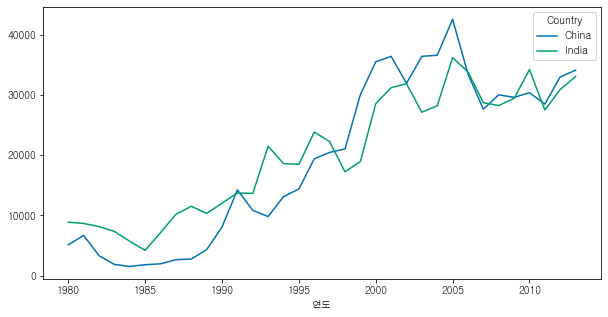

In [29]:
# line plot
df_ci.plot(kind='line')

plt.xlabel('연도')
plt.show()

### 캐나다 이민에 가장 많은 기여를 한 상위 5 개국의 추세를 비교

In [30]:
# pd.set_option('display.max_row', None)
top5 = df_can.loc[:, years].sum(axis=1).sort_values(ascending=False)[:5]
top5

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
dtype: int64

In [31]:
top5_countries = top5.index.tolist()
top5_countries

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [32]:
df_top5 = df_can.loc[top5_countries, years]
df_top5 = df_top5.transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


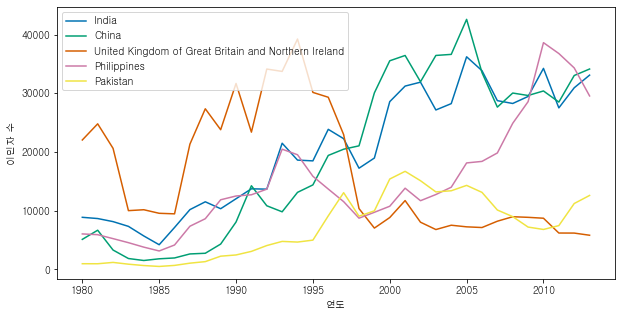

In [34]:
df_top5.plot(kind='line')
ax = plt.gca()
ax.legend(top5_countries)
ax.set_xlabel('연도');
ax.set_ylabel('이민자 수');

## Histogram

- 발생 빈도 비교

<AxesSubplot:ylabel='Frequency'>

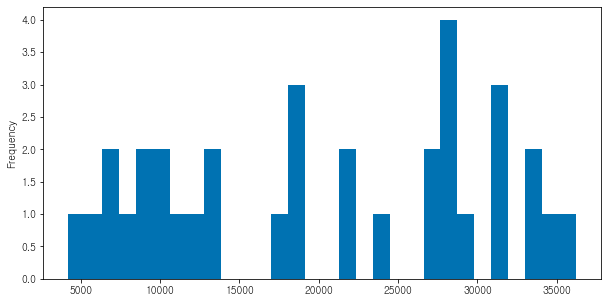

In [35]:
# India 이민자 발생 빈도 비교
df_top5['India'].plot(kind='hist', bins=30)

## Bar Chart

In [36]:
# Iceland 
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

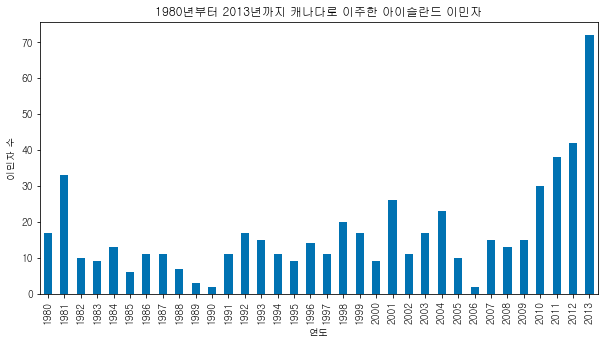

In [38]:
# bar chart
df_iceland.plot(kind='bar')

plt.title('1980년부터 2013년까지 캐나다로 이주한 아이슬란드 이민자')
plt.xlabel('연도')
plt.ylabel('이민자 수');

### 같은 plot 에 여러개의 histogram 겹쳐 그리기

### 1980 년부터 2013 년까지 Denmark, Norway, Sweden 의 Canada 이민자 분포

In [39]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0.5, 0, '이민자 수')

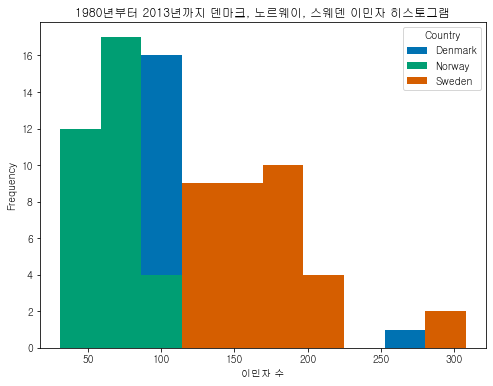

In [40]:
df_t.plot(kind='hist', figsize=(8, 6))

plt.title('1980년부터 2013년까지 덴마크, 노르웨이, 스웨덴 이민자 히스토그램')
plt.xlabel('이민자 수')

### 위의 plot 을 보기 좋게 조정

- np.histogram(array, bin) --> histogram 값, bin edge 반환

In [43]:
# 15 개 구간으로 구분
count, bin_edges = np.histogram(df_t, 15)
count, bin_edges

(array([ 5, 13, 21, 14,  9, 10,  5,  9,  7,  3,  1,  0,  0,  2,  3],
       dtype=int64),
 array([ 31.        ,  49.46666667,  67.93333333,  86.4       ,
        104.86666667, 123.33333333, 141.8       , 160.26666667,
        178.73333333, 197.2       , 215.66666667, 234.13333333,
        252.6       , 271.06666667, 289.53333333, 308.        ]))

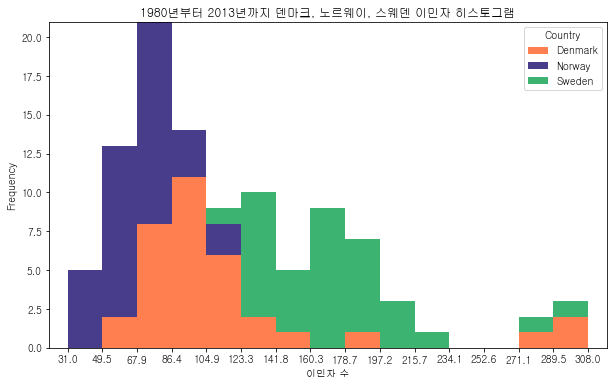

In [44]:
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_t.plot(kind='hist', figsize=(10, 6), 
             bins=15, 
             xticks=bin_edges,
             color=['coral', 'darkslateblue', 'mediumseagreen'], 
             stacked=True, 
             xlim=(xmin, xmax)
             )

plt.title('1980년부터 2013년까지 덴마크, 노르웨이, 스웨덴 이민자 히스토그램')
plt.xlabel('이민자 수')
plt.show()

## Bar Chart + 주석 달기

- 그룹화된 범주형 변수의 크기를 표시

- kind='bar' : 세로막대  
- kind='barh' : 가로막대

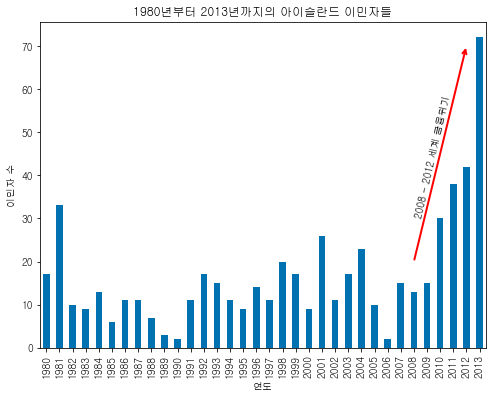

In [45]:
df_iceland.plot(kind='bar', figsize=(8, 6))

plt.title('1980년부터 2013년까지의 아이슬란드 이민자들')
plt.ylabel('이민자 수')
plt.xlabel('연도')

#화살표 그리기
plt.annotate('',                      # 표시할 text
                   xy=(32, 70),       #  화살표의 머리 위치
                   xytext=(28, 20),   # 화살표의 꼬리 위치
                   arrowprops=dict(arrowstyle='->', color='red', lw=2)
            )
#글씨 쓰기
plt.annotate('2008 - 2012 세계 금융위기',      # 표시할 text
                  xy=(28, 30),                   # text 시작 위치
                  rotation=77,                   # trial and error 로 맞춤
                  va='bottom',                   # text 가 vertically bottom 정렬
                  ha='left'                      # text 가 horizontally 좌측 정렬
            )
plt.show()

### 가로막대 plot

- 가로로 표시할 경우 길이 제한을 받지 않아 더 실용적일 수 있음

In [46]:
df_top15 = df_can.head(15)
df_top15 = df_top15[years].transpose()

<AxesSubplot:>

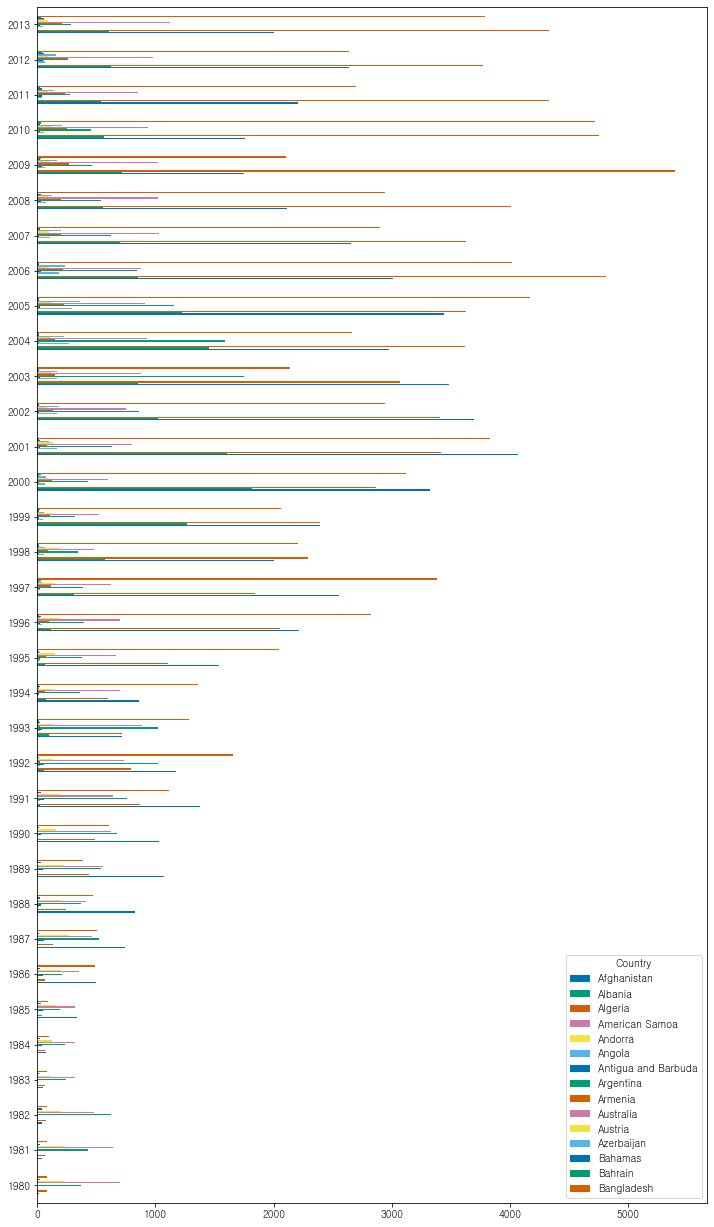

In [47]:
df_top15.plot(kind='barh', figsize=(12, 22))